### Export Checklist:

- Make sure all rows have indices


**More ideas:**

- What is the housing price/rent price trend?
- What does this trend look like when plotted against inflation?
- What about comparing home affordability with the world?
- Also comparying salary compensations for different jobs around the world?

- Which size home price and what cities stayed more steady
- What makes a city a better investment/risk

- Which states' housing price stayed relatively steady vs the opposite? (Hannah)
- Comparing housing price with stock data. (Mini)
- Cities that are most correlated with the stock market


### Misc Data 

- May 2018 National Occupational Employment and Wage Estimates United States (For over 800 occupations)
https://www.bls.gov/oes/current/oes_nat.htm

- Modeled Wage Estimates (MWE) - provide annual estimates of average hourly wages for occupations by selected job characteristics and within geographical location (only for 2014-2017):
https://www.bls.gov/mwe/#data

- Wage data by state or by cities (for 1 year):
https://www.bls.gov/oes/current/oessrcst.htm

- Wage data by characteristics:
https://www.bls.gov/mwe/

- Wage data by metropolitan area (employment vs unemployment):
https://www.bls.gov/oes/current/oessrcma.htm
- (Archives from 1998)
https://www.bls.gov/bls/news-release/metro.htm




- Zillow Home price
https://www.zillow.com/research/data/

### KUSI annual salary needed to afford a house in 50 largest us cities / USA today Most and least affordable zipcode

- Suggestions from Matt
- What about using Zillow data to come up with some meaningul metrics? You can use their API
- There's tons of data about housing. One thing that's not out there yet is the average rental price and how it compared to average home price
- Housing is one area people care about alot. Another is advertising in relation to demographics
- Interested in affordability in any given city, given the price of rent or average 30 year mortgage payment
- If I make 70K/year, can I accord to rent/buy in city x?
- Can I afford to rent one bed, two bed, how about buy?

https://www.kusi.com/study-finds-annual-salary-needed-to-afford-a-house-in-50-largest-u-s-cities/
- people want this kind of data so badly that it breaks news
- If you're able to do this better, you'll get hired on the spot

https://www.yahoo.com/finance/news/homes-sale-most-affordable-zip-091918341.html

**Census Bureau Housing Vacancies and Homeownership Data**
https://www.census.gov/housing/hvs/data/index.html

**US Bureau of Labor Statistics**
Employment Situation Summary Report


### KUSI Is it better to rent or buy in todays housing market 

https://www.cnbc.com/2018/09/05/its-better-to-rent-than-to-buy-in-todays-housing-market.html

- “Today only 41 percent of people live in a county where the median-income family can afford to buy a home at the median list price, and affordability declined significantly over the past year.”

- Home values finally bottomed out in 2012 and then began to take off. In the last three years, the gains accelerated dramatically, and now homes in most of the nation are worth more than they were at the inflated peak of the housing boom in 2006.

- “Housing is an early cycle sector. Interest rates are low, incomes start to grow, so in an early cycle environment you can buy, but in a later cycle, interest rates go up, home prices go up, it’s harder to buy.”

- According to July home and rent prices, buying a home was cheaper than renting in just 35 percent of the nation’s counties. That is down sharply from 44 percent just one year ago.

- In 16 of the 23 major metropolitan markets covered in the research, renting is a better investment than buying. These cities include Atlanta, Dallas, Denver, Houston, Los Angeles, Miami, San Francisco and Seattle. It is still, however, better to buy than rent in much of the Midwest and Northeast, with Chicago and Cleveland showing the best ownership scores.



### Zillow House Affordability Calculator

Zillow House Affordability Calculator
- Annual income
- Monthly debts
- Down payment
- Debt-to-income (DTI) (%)
- Typically, DTI should be 36% or lower to qualify for mortgage. Certain loans allow for higher DTIs, such as FHA loans (43%), VA or USDA loans (41%)
- Interest rate (%)
- Loan term (months)
- Property tax (%)
- Home insurance (/year)
- HOA dues (/month)

### Notes

- Combined the city and state columnd into one in zillow_years:
- zillow_years contains just individual years and City_State columns is right before '1996'

### Setting Up Zillow City Data 

In [19]:
#This format is easer to look at changes in year for a specific city
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
 

zillow = pd.read_csv('City_Zhvi_AllHomes.csv', encoding="Latin-1")

zillow['RegionName'] = zillow['RegionName'].str.title()
zillow['RegionName'] = zillow['RegionName'].str.strip()
zillow['RegionName'] = zillow['RegionName'].str.replace(' City', '')
zillow['RegionName'] = zillow['RegionName'].str.replace(' Village', '')
zillow['State'] = zillow['State'].str.strip()

#getting a list of uniques years for creating new columns later when condensing the dataframe
year_list = (zillow.columns[6:].values.tolist())
years = []
for i in year_list:
    #[0:4] to remove the months following the years ex. '2018-04'
    y = i[0:4]
    if y not in years:
        years.append(y)
        
#Condensing the data into years
zillow_years = zillow.copy()
zillow_years = zillow_years.iloc[:, :6]
zillow_years['City_State'] = zillow_years['RegionName'] + ', ' + zillow_years['State']
# 1996-06 - 1996-12
zillow_years['1996'] = zillow.loc[:,"1996-06":"1997-01"].mean(axis=1)

for i in range(1997,2019):
    zillow_years[str(i)] = zillow.loc[:, str(i) + '-01': str(i+1) + '-01'].mean(axis=1)
#post 2019-01 - 
zillow_years['2019'] = zillow.loc[:,"2019-01":"2019-04"].mean(axis=1)


#zillow data that has months preserved
zillow['City_State'] = zillow['RegionName'] + ', ' + zillow['State']
zillow.head()


,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,City_State
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,169300.0,169800.0,170300.0,170600.0,...,670200,672900,677100,680100,680400,679300,679400,678900,677000,"New York, NY"
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,157700.0,157600.0,157500.0,157300.0,...,678900,682200,686100,688800,690300,691500,691100,688700,686100,"Los Angeles, CA"
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,86500.0,86600.0,86600.0,86700.0,...,181100,181800,182300,183200,184500,185800,187200,187200,186000,"Houston, TX"
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,114000.0,115100.0,116100.0,116600.0,...,227100,227300,227600,227800,228200,228500,229400,230000,229400,"Chicago, IL"
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,86600.0,86400.0,86300.0,86300.0,...,170300,171500,172700,173900,175000,175900,176500,176600,176100,"San Antonio, TX"


### 50 most expensive US cities in 1996, and where they are now 

In [20]:
#This format is easer to look at changes in year for a specific city

#Setting up
fiftychange = zillow_years.copy()

fiftychange['PriceChange'] = fiftychange['2019'] - fiftychange['1996']
fiftychange['PercentChange'] = (fiftychange['PriceChange'] / fiftychange['1996']) * 100
                
#sorting the dataframe
fiftychange = fiftychange.sort_values(by=['1996'], ascending = False)  
fifty96top50 = fiftychange[:50]

fifty96top50.head()


,RegionID,RegionName,State,Metro,CountyName,SizeRank,City_State,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,PriceChange,PercentChange
12852,4721,Fisher Island,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,12853,"Fisher Island, FL",1226200.0,1.229731e+06,1.206400e+06,...,1.972454e+06,2.256031e+06,2.569938e+06,2.896338e+06,3.152800e+06,3.293077e+06,3.172654e+06,3104075.0,1877875.0,153.145898
5799,30280,Atherton,CA,San Francisco-Oakland-Hayward,San Mateo County,5800,"Atherton, CA",1215987.5,1.315469e+06,1.519338e+06,...,3.398985e+06,4.102108e+06,4.581277e+06,5.315585e+06,5.623085e+06,6.181723e+06,6.702600e+06,6527875.0,5311887.5,436.837344
12317,124901,Jupiter Island,FL,Port St. Lucie,Martin County,12318,"Jupiter Island, FL",1187700.0,1.265977e+06,1.451931e+06,...,2.970208e+06,3.349377e+06,3.418300e+06,3.685362e+06,4.126969e+06,4.412385e+06,4.932708e+06,4934500.0,3746800.0,315.466869
11728,23458,Alpine,NJ,New York-Newark-Jersey City,Bergen County,11729,"Alpine, NJ",1075587.5,1.082785e+06,1.065523e+06,...,2.239746e+06,2.558192e+06,2.688738e+06,2.605523e+06,2.700069e+06,2.972408e+06,2.745277e+06,2460350.0,1384762.5,128.744756
11339,6822,Rolling Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,11340,"Rolling Hills, CA",1053862.5,1.058277e+06,1.051915e+06,...,1.922323e+06,2.390969e+06,2.700254e+06,3.060500e+06,3.206869e+06,3.226292e+06,3.353392e+06,3372275.0,2318412.5,219.991934


#### The top 5 most expensive cities in 1996 were:

    - Fisher Island, FL    (1,226,200)
    - Atherton, CA         (1,215,988)
    - Jupiter Island, FL   (1,187,700)
    - Alpine, NJ           (1,075,588)
    - Rolling Hills, CA    (1,053,863)
    
#### Their price in 2018 respectively are:
    - Fisher Island, FL    (3,104,075)
    - Atherton, CA         (6,527,875)
    - Jupiter Island, FL   (4,934,500)
    - Alpine, NJ           (2,460,350)
    - Rolling Hills, CA    (3,372,275)

### Top cities with growth, steady, decline 

In [21]:
fiftychange = fiftychange.sort_values(by=['PercentChange'], ascending = True)

fifty9619 = fiftychange.copy()
#Not interested in columns '1997 - '2018'

#Dropping the list of years so that it's just 1996 and 2019

for i in range(1997,2019):
    fifty9619 = fifty9619.drop(str(i), axis=1)

fifty9619= fifty9619.drop(columns=['RegionID','Metro','SizeRank'])
fifty9619= fifty9619.dropna()
fifty9619= fifty9619.sort_values(by=['PercentChange'], ascending= False)

#Cities with most growth
fifty9619top = fifty9619.head(25)
fiftypercenttop25 = fifty9619top['State'].value_counts()

#Cities with most decrease
fifty9619bottom = fifty9619.tail(25)
fifty9619bottom = fifty9619bottom.sort_values(by=['PercentChange'], ascending= True)
fiftypercentbottom25 = fifty9619bottom['State'].value_counts()

#Cities that stayed the same
fifty9619mid = fifty9619.copy()
fifty9619mid['PercentChange'] = fifty9619mid['PercentChange'].abs()
fifty9619mid = fifty9619mid.sort_values(by=['PercentChange'], ascending= True)
fifty9619mid = fifty9619mid.head(25)
fiftypercentmid = fifty9619mid['State'].value_counts()

fifty9619top.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
12845,Wainscott,NY,Suffolk County,"Wainscott, NY",383000.0,4020300.0,3637300.0,949.686684
12579,Amagansett,NY,Suffolk County,"Amagansett, NY",318762.5,3318175.0,2999412.5,940.955257
10978,Warriors Mark,PA,Huntingdon County,"Warriors Mark, PA",23675.0,200275.0,176600.0,745.934530
10993,Crumpler,NC,Ashe County,"Crumpler, NC",16175.0,133075.0,116900.0,722.720247
10214,Bridgehampton,NY,Suffolk County,"Bridgehampton, NY",319237.5,2601325.0,2282087.5,714.855711


In [22]:
fifty9619mid.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
10163,Walnut,IL,Bureau County,"Walnut, IL",79062.5,78925.0,-137.5,0.173913
1199,Euclid,OH,Cuyahoga County,"Euclid, OH",78837.5,78525.0,-312.5,0.396385
10377,Clintonville,WI,Waupaca County,"Clintonville, WI",76325.0,76650.0,325.0,0.425811
2628,Ferguson,MO,Saint Louis County,"Ferguson, MO",60875.0,61225.0,350.0,0.574949
11406,Cool Valley,MO,Saint Louis County,"Cool Valley, MO",54387.5,54725.0,337.5,0.620547


In [23]:
fifty9619bottom.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
276,Flint,MI,Genesee County,"Flint, MI",47100.0,19125.0,-27975.0,-59.394904
3715,Rock Falls,IL,Whiteside County,"Rock Falls, IL",105262.5,71275.0,-33987.5,-32.288327
11693,Phoenix,IL,Cook County,"Phoenix, IL",58125.0,41400.0,-16725.0,-28.774194
3818,Riverdale,IL,Cook County,"Riverdale, IL",68050.0,49650.0,-18400.0,-27.038942
10613,Capron,IL,Boone County,"Capron, IL",169275.0,127875.0,-41400.0,-24.457244


### Median Housing Price By State 

In [24]:
statemedian96 = fifty9619.groupby('State')['1996'].median()
statemedian19 = fifty9619.groupby('State')['2019'].median()
statemedian19.head()

State
AK    267600.0
AL    145825.0
AR    135312.5
AZ    226425.0
CA    497550.0
Name: 2019, dtype: float64

### US City Population Top 50

In [25]:
#uspop18 data starts from 2010 and ends with 2019

uspopraw = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding="Latin-1")
#population estimate from 2010 to 2018
states_list = pd.read_csv('states.txt', encoding="Latin-1")

#print(uspopraw.head())
#2018 population
uspop18 = pd.DataFrame()
uspop18 = uspopraw.iloc[1:,[2, -9,-8,-7,-6,-5,-4,-3,-2,-1]]
#should be up to -9 which will include 2010

uspop18.columns = ['city_state', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
# an initial sort revealed that the datatype for '2018' was not integer

#creating new columns from 2010 to 2018
for i in range(2010, 2019):
    uspop18[str(i)] = pd.to_numeric(uspop18[str(i)])
    
    
uspop18 = uspop18.sort_values(by=['2018'], ascending = False)

#data cleaning
uspop18['city_state'] = uspop18.city_state.str.title()
uspop18['city_state'] = uspop18.city_state.str.strip()
uspop18['city'], uspop18['state'] = uspop18.city_state.str.split(',').str
uspop18['city'] = uspop18['city'].str.title()
uspop18['city'] = uspop18['city'].str.strip()
uspop18['city'] = uspop18['city'].str.replace(' County Metro Government', '')
uspop18['city'] = uspop18['city'].str.replace(' Metropolitan Government', '')
uspop18['city'] = uspop18['city'].str.replace(' Borough', '')
uspop18['city'] = uspop18['city'].str.replace(' County', '')
uspop18['city'] = uspop18['city'].str.replace(' City', '')
uspop18['city'] = uspop18['city'].str.replace(' city', '')
uspop18['city'] = uspop18['city'].str.replace(' Town', '')
uspop18['city'] = uspop18['city'].str.replace(' town', '')
uspop18['city'] = uspop18['city'].str.replace(' Village', '')
uspop18['city'] = uspop18['city'].str.replace(' village', '')
uspop18['city'] = uspop18['city'].str.replace(r'\(.*\)','')
#Removes (Balance)
uspop18['city'] = uspop18['city'].str.replace('.', '')
uspop18['city'] = uspop18['city'].str.strip()
uspop18['state'] = uspop18['state'].str.strip()


#Remapping uspop18 so that the format would be matching the zillow_years in 'Pasadena, CA' format
states_list.State = states_list.State.str.title()
#without this above line, the result for DC would be nan, since one is District of Columbia, vs District Of Columbia
states_dic = states_list.set_index('State')['Abbreviation'].to_dict()
uspop18['state_abb'] = uspop18['state'].map(states_dic)
uspop18['city_state_cleaned'] = uspop18['city'] + ', ' + uspop18['state_abb']


#top50cities = uspop18[:51]

#new dataframe prepared for merging with zillow_years
uspop18merge = pd.DataFrame()
uspop18merge['2010'] = uspop18['2010']
uspop18merge['2011'] = uspop18['2011']
uspop18merge['2012'] = uspop18['2012']
uspop18merge['2013'] = uspop18['2013']
uspop18merge['2014'] = uspop18['2014']
uspop18merge['2015'] = uspop18['2015']
uspop18merge['2016'] = uspop18['2016']
uspop18merge['2017'] = uspop18['2017']
uspop18merge['2018'] = uspop18['2018']


uspop18merge['City_State'] = uspop18['city_state_cleaned']
#uspop18mergefinal = uspop18merge.sort_values(by=['2018'], ascending = False)
uspop18merge.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,City_State
11698,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748,"New York, NY"
1443,3795370,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456,"Los Angeles, CA"
3415,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994,"Chicago, IL"
17040,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502,"Houston, TX"
665,1449295,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,"Phoenix, AZ"


### Top 5 Populated City Price Data Visualized

In [26]:
fiftychange

,RegionID,RegionName,State,Metro,CountyName,SizeRank,City_State,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,PriceChange,PercentChange
276,398007,Flint,MI,Flint,Genesee County,277,"Flint, MI",47100.0,50130.769231,52469.230769,...,13200.000000,13115.384615,12476.923077,12130.769231,12623.076923,14115.384615,18361.538462,19125.0,-27975.0,-59.394904
3715,54183,Rock Falls,IL,Sterling,Whiteside County,3716,"Rock Falls, IL",105262.5,99784.615385,80346.153846,...,70676.923077,68415.384615,70361.538462,72653.846154,73507.692308,73261.538462,70130.769231,71275.0,-33987.5,-32.288327
11693,26480,Phoenix,IL,Chicago-Naperville-Elgin,Cook County,11694,"Phoenix, IL",58125.0,55307.692308,57023.076923,...,38476.923077,38100.000000,38576.923077,34615.384615,36761.538462,37146.153846,38292.307692,41400.0,-16725.0,-28.774194
3818,6783,Riverdale,IL,Chicago-Naperville-Elgin,Cook County,3819,"Riverdale, IL",68050.0,65200.000000,70346.153846,...,39561.538462,41546.153846,37223.076923,34400.000000,37723.076923,44461.538462,45038.461538,49650.0,-18400.0,-27.038942
10613,34957,Capron,IL,Rockford,Boone County,10614,"Capron, IL",169275.0,142461.538462,111815.384615,...,111900.000000,115415.384615,119707.692308,124523.076923,124853.846154,123492.307692,125300.000000,127875.0,-41400.0,-24.457244
8715,53437,Mount Morris,IL,Rochelle,Ogle County,8716,"Mount Morris, IL",104537.5,91000.000000,69361.538462,...,76984.615385,78384.615385,60661.538462,49900.000000,56207.692308,81153.846154,80700.000000,80625.0,-23912.5,-22.874567
8617,40390,Polo,IL,Rochelle,Ogle County,8618,"Polo, IL",109700.0,96923.076923,76630.769231,...,75184.615385,76330.769231,59469.230769,49684.615385,57184.615385,83361.538462,83415.384615,84700.0,-25000.0,-22.789426
1638,3629,Belvidere,IL,Rockford,Boone County,1639,"Belvidere, IL",176437.5,144669.230769,108807.692308,...,117076.923077,119092.307692,122261.538462,126500.000000,128369.230769,129615.384615,135307.692308,136350.0,-40087.5,-22.720510
10674,38567,Forreston,IL,Rochelle,Ogle County,10675,"Forreston, IL",104487.5,91046.153846,70723.076923,...,76484.615385,78292.307692,60600.000000,50607.692308,57746.153846,84184.615385,83915.384615,82900.0,-21587.5,-20.660366
2513,54553,Sterling,IL,Sterling,Whiteside County,2514,"Sterling, IL",105075.0,95300.000000,69438.461538,...,77923.076923,76423.076923,78715.384615,81900.000000,83969.230769,83923.076923,80723.076923,83650.0,-21425.0,-20.390197


### Top 5 Populated City Price Data Visualized With Month

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


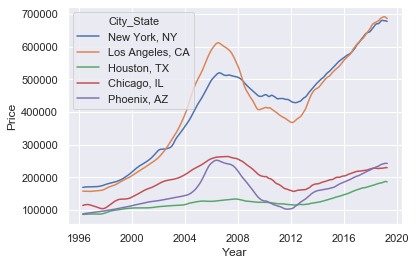

In [41]:
zillowvisual = zillow.copy()
zillowvisual = zillowvisual.iloc[:, 6:]

zillowvisuallong = pd.melt(zillowvisual, id_vars='City_State', var_name='Year', value_name='Price')
top5pop_cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ']
#These are the top 5 most populated cities

zillowvisualtop5 = zillowvisuallong[zillowvisuallong.City_State.isin(top5pop_cities)]
zillowvisualtop5['Year'] = pd.to_datetime(zillowvisualtop5['Year'], format= '%Y-%m')

sns.set()
top5plot = sns.lineplot(x='Year', y='Price', hue='City_State', data=zillowvisualtop5)

### Complete Reversed

In [28]:
#from fuzzywuzzy import fuzz
#
##Left- zillow_years
##Right- uspop18mergefinal
#
#def match_name(name, match_list, min_score=0):
##iterating through list names and returns best match (name2) for name
#    # -1 score incase we don't get any matches
#    max_score = -1
#    # Returning empty name for no match as well
#    max_name = ""
#    # Iternating over all names in the other
#    for matchname in match_list:
#        name = str(name)
#        matchname = str(matchname)
#        if matchname[-2:] == name[-2:]:
#            #Finding fuzzy match score
#            score = fuzz.ratio(name, matchname)
#            # Checking if we are above our threshold and have a better score
#            if (score > min_score) & (score > max_score):
#                max_name = matchname
#                max_score = score
#    return (max_name, max_score)
#    
#dict_list = []
#for name in uspop18mergefinal.City_State:
#    match = match_name(name, zillow_years.City_State, 60)
#    # New dict for storing data
#    dict_ = {}
#    dict_.update({"Name" : name})
#    dict_.update({"Match-Name" : match[0]})
#    dict_.update({"score" : match[1]})
#    dict_list.append(dict_)
#    
#merge_tablecompletehongreversed = pd.DataFrame(dict_list)
#
#
#

In [29]:
import pickle

#pickle_out = open('merge_tablecompletehongreversed.pickle', 'wb')
#pickle.dump(merge_tablecompletehongreversed, pickle_out)
#pickle_out.close()

pickle_in = open('merge_tablecompletehongreversed.pickle', 'rb')
merge_tablecompletehongreversed = pickle.load(pickle_in)

In [30]:
print(merge_tablecompletehongreversed.head())
#The right side is from population data, Left is zillow

        Match-Name             Name  score
0     New York, NY     New York, NY    100
1  Los Angeles, CA  Los Angeles, CA    100
2      Chicago, IL      Chicago, IL    100
3      Houston, TX      Houston, TX    100
4      Phoenix, AZ      Phoenix, AZ    100


### List matching for entire Zillow_year with uspop

In [31]:
#Taking the dataframe apart, removing - and /

merge_complete = merge_tablecompletehongreversed.copy()

slash = merge_complete[merge_complete['Name'].str.contains('/', na = False)]
dash = merge_complete[merge_complete['Name'].str.contains('-', na = False)]
saint = merge_complete[merge_complete['Name'].str.contains('St ', na = False)]

#realzing that nashville, TN didn't merge so coming back to edit this in
#nashvilleindex = merge_complete[merge_complete['Name'].str.contains('Nashville', na = False)]
nashville = merge_complete[merge_complete['Name'] == 'Nashville-Davidson, TN']

merge_complete = merge_complete.drop(slash.index.values, axis=0)
merge_complete = merge_complete.drop(dash.index.values, axis=0)
merge_complete = merge_complete.drop(saint.index.values, axis=0)
merge_complete = merge_complete[merge_complete['score'] >= 95]

#after some analysis, it seems like everything 97 and above is good except La Canana from 96

merge_complete = merge_complete.sort_values(by=['score'], ascending = False)
merge_complete.tail(20)
laca = merge_complete[merge_complete['Name'] == 'La Cañada Flintridge, CA']

#This is to get the index of 'La Canada Flintridge'
merge_complete.loc[1813,'score'] = 97
merge_complete.drop(merge_complete[merge_complete['score'] < 97].index, inplace= True)
#merge_complete.tail(20)
merge_complete.to_csv('mergecomplete.csv', index= False)

#cleaning up the saint
#dash[dash['score']>50]
saint = saint.sort_values(by=['score'], ascending = False)
#east petersberg is the only one with 89 that's not accurate 14559
saint.loc[14559, 'score'] = 88
saint = saint[saint['score'] > 88]


dash = dash.sort_values(by=['score'], ascending= False)
dash.loc[59, 'score'] = 95
dash.loc[8059, 'score'] = 85
# 59 Lexington-Fayette Urban, KY is the only low score which should match
#8059 Avon-By-The-Sea, NJ is scored 84, should bump up to 85 and remove everyting below 85
dash = dash[dash['score'] > 84]

merge_combined = pd.concat([merge_complete, slash, dash, saint, nashville])
merge_combined.drop(['score'], axis=1, inplace= True)
merge_combinedmap = merge_combined[['Name', 'Match-Name']]
#This flips the order of the Name and Match-Name so that population data(Name) is now on left


In [73]:
#mapping dictionary for uspop18merge

popfinalmerge = uspop18merge.copy()
uspoptozillowmap = merge_combinedmap.copy()

uspoptozillowmap = uspoptozillowmap.set_index('Name')['Match-Name'].to_dict()
#mapping pop18merge to zillow_years on 'City_State'
popfinalmerge['City_State'] = popfinalmerge['City_State'].map(uspoptozillowmap)

#12946 Detroit city, Michigan
#12947 Nashville-Davidson metropolitan government (balance), Tennessee
#zillpopsorted18.to_csv('zillpopfinal.csv', index=False)

#popmelted = pd.melt(popfinalmerge, 
#                    id_vars = ['City_State'], 
#                    var_name = 'Year', 
#                    value_name = 'Population'
#                   )


popfinalmerge.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,City_State
11698,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748,"New York, NY"
1443,3795370,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456,"Los Angeles, CA"
3415,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994,"Chicago, IL"
17040,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502,"Houston, TX"
665,1449295,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,"Phoenix, AZ"


Calculating population change percent so that visualizationw would be clearer

In [75]:
popchange = popfinalmerge.copy()
for i in range(2010,2018):
    popchange[str(i+1) + 'p'] = ((popchange[str(i+1)] - popchange[str(i)]) /popchange[str(i)] )*100
popchange = popchange.iloc[:,9:]

popchange.head()



,City_State,2011p,2012p,2013p,2014p,2015p,2016p,2017p,2018p
11698,"New York, NY",1.008601,0.907402,0.607413,0.460164,0.364971,0.092050,-0.444846,-0.468378
1443,"Los Angeles, CA",0.678880,0.821640,0.814633,0.755526,0.765474,0.660552,0.320966,0.212305
3415,"Chicago, IL",0.395918,0.425595,0.258738,0.064252,-0.084625,-0.266633,-0.216223,-0.260701
17040,"Houston, TX",1.224573,1.692118,1.768170,1.942519,2.036964,1.011182,0.333066,0.347667
665,"Phoenix, AZ",1.432214,2.026255,1.833330,1.912873,1.822939,1.807907,1.326429,1.546682


### Top 5 Most Populated Cities Visualized

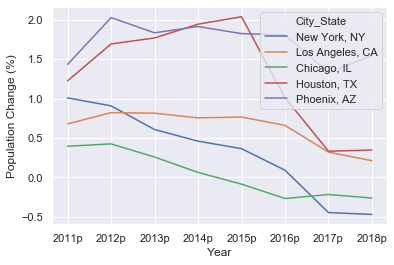

In [76]:
popfinalvisualize = popchange.dropna()
popfinalvisualize = pd.melt(popfinalvisualize, id_vars='City_State', var_name='Year', value_name='Population Change (%)')
top5pop_cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ']
popfinalvisualize = popfinalvisualize[popfinalvisualize.City_State.isin(top5pop_cities)]
popfinalvisualize.head()

sns.lineplot(x='Year', y='Population Change (%)', hue='City_State', data=popfinalvisualize)

#sns.tsplot(popfinalvisualize, time='Year', unit = "City_State", 
#               condition='City_State', value='Population Size')

### Merging Zillyear with population
 

In [34]:
zillyears = zillow_years.copy()
#zillyears = zillyears.drop('RegionID', axis=1)
#zillyears = zillyears.drop('RegionName', axis=1)
#zillyears = zillyears.drop('State', axis=1)
#zillyears.to_csv('zillyearsduplicate.csv', index=False)

zilldroplist = []
for i in range(1996,2010):
    zilldroplist.append(str(i))
zillyears.drop(zilldroplist, axis=1, inplace=True)
zillyears.drop('2019', axis=1, inplace=True)


uspoppremerge = uspop18merge.copy()
uspoppremerge.columns = ['2010_Population', '2011_Population', '2012_Population', '2013_Population', '2014_Population', '2015_Population', '2016_Population', '2017_Population', '2018_Population', 'City_State']
zillpopmerged = zillyears.merge(uspoppremerge, left_on = 'City_State', right_on = 'City_State')


### Rental Data

In [35]:
zillowrental = pd.read_csv('City_Zri_AllHomesPlusMultifamilyRental.csv', encoding="Latin-1")
zillowrentsingle = pd.read_csv('City_Zri_SingleFamilyResidenceRental.csv', encoding="Latin-1")
zillowrentmulti = pd.read_csv('City_Zri_MultiFamilyResidenceRental.csv', encoding="Latin-1")

def initialClean(d):
    d['RegionName'] = d['RegionName'].str.title()
    d['RegionName'] = d['RegionName'].str.strip()
    d['RegionName'] = d['RegionName'].str.replace(' City', '')
    d['RegionName'] = d['RegionName'].str.replace(' Village', '')
    d['State'] = d['State'].str.strip()
    return d

zillowrental = initialClean(zillowrental)
zillowrentsingle = initialClean(zillowrentsingle)
zillowrentmulti = initialClean(zillowrentmulti)

#Since the data starts from Nov of 2010, need to condense the zillowyears later to match

zillowrentalyears = zillowrental.copy()
zillowrentsingleyears = zillowrentsingle.copy()
zillowrentmultiyears = zillowrentmulti.copy()

def converttoyears(d, oldd, suf):
    d = d.iloc[:, :6]
    d['City_State'] = d['RegionName'] + ', ' + d['State']
    d['2010' + suf] = oldd.loc[:,"2010-11":"2011-01"].mean(axis=1)
    for i in range(2011,2019):
        d[str(i) + suf] = oldd.loc[:, str(i) + '-01': str(i+1) + '-01'].mean(axis=1)
    #can't include 2019 because population data only goes to 2018
    d.drop(['RegionName'], axis=1, inplace= True)
    d.drop(['State'], axis=1, inplace= True)
    d.drop(['SizeRank'], axis=1, inplace= True)
    d.drop(['RegionID'], axis=1, inplace= True)
    d.drop(['Metro'], axis=1, inplace= True)
    d.drop(['CountyName'], axis=1, inplace= True)

    #d = d.iloc[:, 3:]
    #remove all the columns before 'City_State'
    return d

zillrentyears = converttoyears(zillowrentalyears, zillowrental, 'Y')

#in the end decided to just use rent years because there was more data and the numbers were very similar to the other two


#Merging in 
zillpoprentmerged = zillpopmerged.merge(zillrentyears, left_on = 'City_State', right_on = 'City_State')
zillpoprentmerged.head(10)


,RegionID,RegionName,State,Metro,CountyName,SizeRank,City_State,2010,2011,2012,...,2018_Population,2010Y,2011Y,2012Y,2013Y,2014Y,2015Y,2016Y,2017Y,2018Y
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,"New York, NY",447976.923077,438761.538462,433323.076923,...,8398748,1771.666667,1753.384615,1803.615385,1955.384615,2124.000000,2271.230769,2331.846154,2337.384615,2295.846154
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,"Los Angeles, CA",407030.769231,381092.307692,381561.538462,...,3990456,2190.333333,2185.076923,2185.000000,2242.692308,2331.384615,2522.692308,2687.000000,2798.307692,2883.153846
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,"Houston, TX",121876.923077,117815.384615,116107.692308,...,2325502,1198.666667,1195.538462,1197.846154,1252.692308,1322.076923,1411.461538,1439.461538,1423.615385,1432.923077
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,"Chicago, IL",192246.153846,167915.384615,159992.307692,...,2705994,1562.000000,1502.615385,1497.615385,1556.615385,1636.230769,1663.923077,1670.076923,1644.846154,1619.384615
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,"San Antonio, TX",119623.076923,116723.076923,116446.153846,...,1532233,1049.666667,1021.538462,1051.692308,1084.692308,1142.923077,1211.846154,1239.923077,1265.538462,1277.230769
5,13271,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,6,"Philadelphia, PA",113007.692308,106392.307692,101869.230769,...,1584138,1096.666667,1085.769231,1088.153846,1086.769231,1126.615385,1180.923077,1210.615385,1215.230769,1218.846154
6,40326,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7,"Phoenix, AZ",119953.846154,105915.384615,117500.000000,...,1660272,1078.666667,1051.769231,1047.538462,1088.538462,1112.076923,1177.692308,1231.461538,1274.000000,1307.384615
7,18959,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,8,"Las Vegas, NV",133223.076923,120423.076923,122715.384615,...,644644,1181.000000,1161.538462,1127.615385,1140.076923,1161.846154,1188.384615,1224.923077,1258.615385,1303.923077
8,54296,San Diego,CA,San Diego-Carlsbad,San Diego County,9,"San Diego, CA",405592.307692,380415.384615,384023.076923,...,1425976,2062.000000,2016.615385,2019.538462,2082.615385,2177.846154,2321.153846,2429.076923,2531.076923,2586.461538
9,38128,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,10,"Dallas, TX",106746.153846,100946.153846,98715.384615,...,1345047,1134.666667,1127.923077,1127.153846,1196.538462,1231.230769,1282.461538,1355.538462,1420.000000,1456.692308
